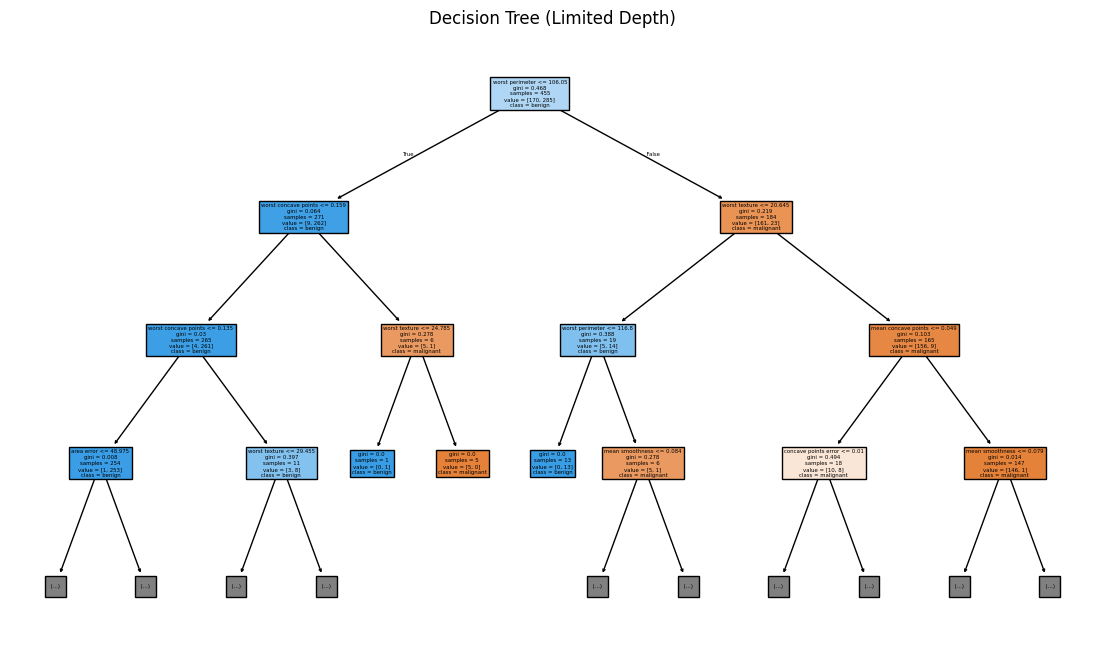

Pruned Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.956140350877193
Random Forest Performance:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



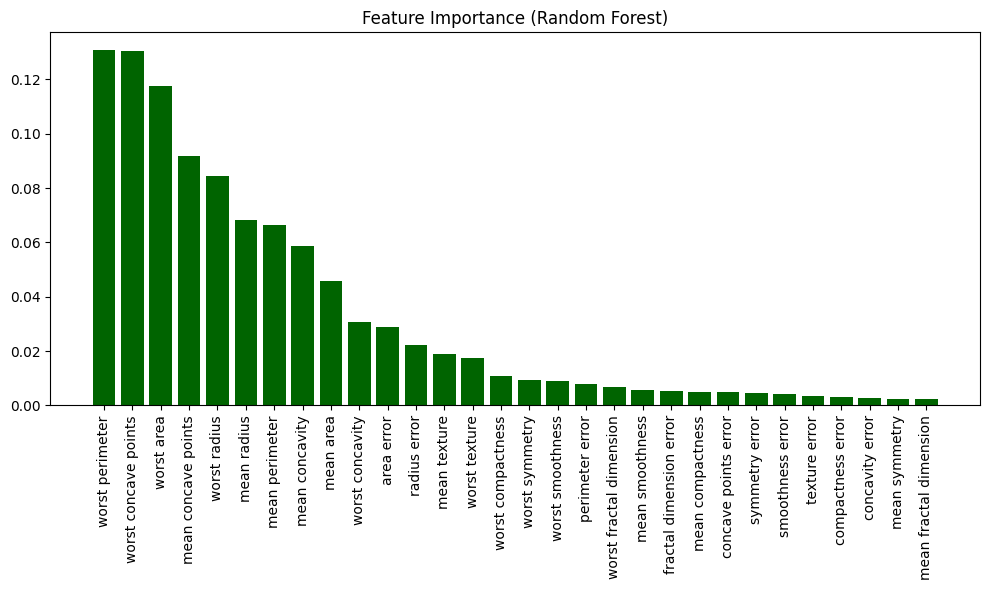

Decision Tree CV Accuracy (depth=4): 0.9173730787144854
Random Forest CV Accuracy: 0.9595870206489675


In [1]:
# Task 5: Tree-Based Classification Models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Load data
cancer = load_breast_cancer()
features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
labels = pd.Series(cancer.target)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

# Initialize and train Decision Tree
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)

# Tree visualization (top 3 levels only)
plt.figure(figsize=(14, 8))
plot_tree(tree_model, max_depth=3, feature_names=features.columns,
          class_names=cancer.target_names, filled=True)
plt.title("Decision Tree (Limited Depth)")
plt.show()

# Pruned Decision Tree to prevent overfitting
tree_pruned = DecisionTreeClassifier(max_depth=4, random_state=1)
tree_pruned.fit(X_train, y_train)
tree_pred = tree_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))

# Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

# Accuracy and Report
print("Random Forest Accuracy:", accuracy_score(y_test, forest_pred))
print("Random Forest Performance:\n", classification_report(y_test, forest_pred))

# Feature Importance Plot
importance = forest.feature_importances_
sorted_idx = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance[sorted_idx], color='darkgreen')
plt.xticks(range(len(importance)), features.columns[sorted_idx], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

# Cross-validation comparison
dt_scores = cross_val_score(tree_pruned, features, labels, cv=5)
rf_scores = cross_val_score(forest, features, labels, cv=5)

print("Decision Tree CV Accuracy (depth=4):", dt_scores.mean())
print("Random Forest CV Accuracy:", rf_scores.mean())
